In [2]:
import GOES as GOES
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import pandas as pd

# import cartopy.crs as ccrs
import numpy as np
# from cartopy.feature import NaturalEarthFeature

import sys  
sys.path.insert(0, '../lib')

# import Utilities as util
import test as util

## Functions

In [3]:
DateTimeIni = '20200102-190000'
DateTimeFin = '20200102-192000'
# download the data
flist_cth = GOES.download('goes16', 'ABI-L2-ACHAF', # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
                      DateTimeIni = DateTimeIni, DateTimeFin = DateTimeFin, 
                      path_out='../data/raw_data')

flist_cod = GOES.download('goes16', 'ABI-L2-CODF', # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
                      DateTimeIni = DateTimeIni, DateTimeFin = DateTimeFin, 
                      path_out='../data/raw_data')

flist = GOES.download('goes16', 'ABI-L2-CTPC', # see https://www.noaa.gov/organization/information-technology/list-of-big-data-program-datasets for product names
                      DateTimeIni = DateTimeIni, DateTimeFin = DateTimeFin, 
                      path_out='../data/raw_data')

Files:
  OR_ABI-L2-ACHAF-M6_G16_s20200021900215_e20200021909523_c20200021911404.nc 100% 1.5MB 1s
  OR_ABI-L2-ACHAF-M6_G16_s20200021910215_e20200021919523_c20200021921481.nc 100% 1.5MB 1s
Files:
  OR_ABI-L2-CODF-M6_G16_s20200021900215_e20200021909523_c20200021911490.nc 100% 7.3MB 3s
  OR_ABI-L2-CODF-M6_G16_s20200021910215_e20200021919523_c20200021922069.nc 100% 7.3MB 3s
Files:
  OR_ABI-L2-CTPC-M6_G16_s20200021901183_e20200021903556_c20200021906016.nc 100% 0.3MB 0s
  OR_ABI-L2-CTPC-M6_G16_s20200021906183_e20200021908556_c20200021910523.nc 100% 0.3MB 2s
  OR_ABI-L2-CTPC-M6_G16_s20200021911183_e20200021913556_c20200021915580.nc 100% 0.3MB 2s
  OR_ABI-L2-CTPC-M6_G16_s20200021916183_e20200021918556_c20200021921403.nc 100% 0.3MB 0s


In [4]:
file_cth = flist_cth[0]
file_cod = flist_cod[0]
flist = flist[0]

In [5]:
xr.open_dataset(flist)

<xarray.Dataset>
Dimensions:                                 (number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 500, y: 300)
Coordinates:
    t                                       datetime64[ns] ...
  * y                                       (y) float32 0.1281 ... 0.04438
  * x                                       (x) float32 -0.1012 ... 0.0385
    y_image                                 float32 ...
    x_image                                 float32 ...
    local_zenith_angle                      float32 ...
    solar_zenith_angle                      float32 ...
Dimensions without coordinates: number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables: (12/23)
    PRES                                    (y, x) float32 ...
    DQF                                     (y, x) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_imager_projection                  int32 ...
    y_image_bounds                          (number_of_image_bounds) float32 ...
    x_image_bounds                          (number_of_image_bounds) float32 ...
    ...                                      ...
    algorithm_product_version_container     int32 ...
    local_zenith_angle_bounds               (number_of_LZA_bounds) float32 ...
    solar_zenith_angle_bounds               (number_of_SZA_bounds) float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    cloud_pixels                            float64 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2020-01-02T19:01:18.3Z
    time_coverage_end:         2020-01-02T19:03:55.6Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        25bf875e-5929-4ced-9f76-a5c53ecdb3a1

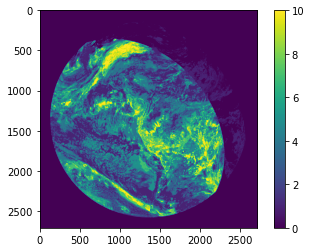

In [61]:
# reads the file using xarray
ds_cod = xr.open_dataset(file_cod)
ds_cth_coarse = xr.open_dataset(file_cth)

# get image with the coordinates of corners of their pixels
# -> Figure out later

# interpolate ds_cod such that points overlap
ds_cth = ds_cth_coarse.interp(x=ds_cod.x, y=ds_cod.y)



ct = util.classifyISCCP(ds_cod.COD, ds_cth.HT, ds_cod.DQF)
# # add classification to x_array
# # ds_cth.assign(CT = ct)
# # clearsky

plt.imshow(ct)
plt.colorbar()
plt.show()

# plt.plot(ct.flatten(), ds_cod.COD.data.flatten(), '.')
# plt.xlabel('cloud type')
# plt.ylabel('cod')
# plt.show()

# plt.plot(ct.flatten(), ds_cth.HT.data.flatten(), '.')
# plt.xlabel('cloud type')
# plt.ylabel('cth')
# plt.show()
# np.unique(ct)

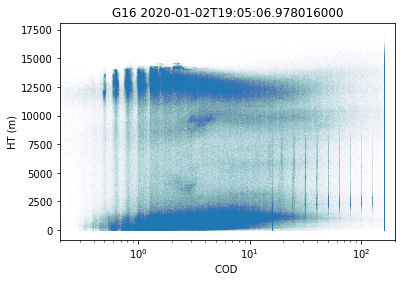

In [62]:
plt.scatter(ds_cod.COD.data.flatten(), ds_cth.HT.data.flatten(), alpha = .01, s = .1)
plt.title(f'{ds_cod.platform_ID} {ds_cod.t.data}')
plt.xlabel(f'COD ')
plt.ylabel(f'HT ({ds_cth.HT.units})')
plt.xscale('log')
plt.xlim([.2, 200])
plt.show()

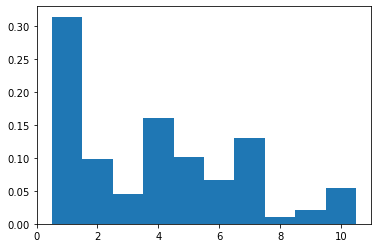

In [63]:
util.histClassifications(ct)    
plt.show()

Try to get the right domain

In [64]:
image = util.makeXArrayFromNetCDFs(file_cod, file_cth)
# plt.imshow(xr_cth.cth)
# plt.show()
# plt.imshow(res.cth)
# plt.show()


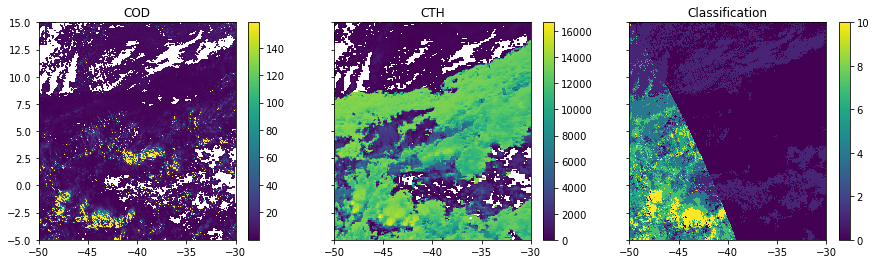

In [65]:
# Classify the clouds
ct = util.classifyISCCP(image.cod, image.cth, image.dqf_cod)
image = image.assign(ct = (["x", "y"], ct))

util.plotImage(image)
plt.show()


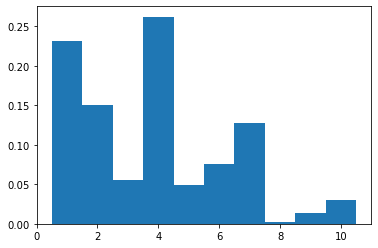

In [23]:
util.histClassifications(ct)
plt.show()

In [11]:
# Check how large saving the image would be (without the lat, lon coordinates, because they will be the same for every image)
 
util.saveImage(image)

In [ ]:
image.extent

In [12]:
# Perform function to go from downloaded data to image with correct domain and classification in netcdf file

util.rawDatatoClassification(flist_cth, flist_cod)


<xarray.Dataset>
Dimensions:  (x: 535, y: 430)
Coordinates:
    lon      (x, y) float32 -50.0 -49.95 -49.91 -49.87 ... -29.91 -29.85 -29.79
    lat      (x, y) float32 15.0 15.0 15.0 15.0 ... -5.12 -5.121 -5.122 -5.122
  * x        (x) float64 0.0 0.001873 0.003745 0.005618 ... 0.9963 0.9981 1.0
  * y        (y) float64 0.0 0.002331 0.004662 0.006993 ... 0.9953 0.9977 1.0
    time     datetime64[ns] 2020-01-02T10:45:07.202625024
Data variables:
    cod      (x, y) float32 nan nan nan nan 15.15 nan ... nan nan nan nan nan
    dqf_cod  (x, y) float32 6.0 6.0 6.0 6.0 4.0 6.0 ... 0.0 6.0 6.0 6.0 6.0 6.0
    cth      (x, y) float32 nan nan nan nan nan nan ... nan nan nan nan nan nan
    ct       (x, y) int32 1 1 1 1 0 1 1 1 1 1 1 1 1 ... 4 4 4 4 4 4 4 1 1 1 1 1
Attributes:
    extent:   [-50.0, -30.0, -5.0, 15.0]

Calculate Transition between subsequent images